## PROCESSING DATA

In [3]:
import pandas as pd
import numpy as np

lms = pd.read_csv("/Users/dieciseis/Downloads/Learning_Data_Analyst_Dataset.csv")

In [4]:
lms.head()

,Employee ID,Location,Location Type,Job Type,Training Program,Assignment Type,Content Source,Content Vendor,Assignment Date,Due Date,...,Expected Course Time (Minutes),Actual Course Time (Minutes),Assessment Score,Reassignment Count,Delivery Method,Training Engagement Score,Training Hours Logged,Cost per Learner,Manager ID,Training Feedback Rating
0,E1007,Pasadena,Office,Manager,Delegation,Assigned by Manager,ACCO,Traliant (Harassment Prevention),12/26/24,3/11/25,...,20,22.0,60.0,0,Instructor-Led,4.23,9.33,394.75,M47,1.7
1,E1120,Boise,Field,Manager,Harassment Prevention,Assigned by Self,OpenSesame,Traliant (Harassment Prevention),1/1/25,3/5/25,...,30,35.0,50.0,0,Hybrid,7.83,7.67,371.54,M7,1.4
2,E1075,Seattle,Office,IC,Leadership Essentials,Assigned by Self,Ninjio,Lynda.com,11/18/24,2/15/25,...,40,45.0,69.0,0,Instructor-Led,5.59,3.07,467.85,M28,4.9
3,E1041,Boise,Office,IC,Safety Training,Assigned by Self,ACCO,Ally Safety (Safety),12/1/24,2/1/25,...,45,50.0,81.0,0,Hybrid,5.82,6.83,441.27,M28,3.1
4,E1079,Pasadena,Shop,Manager,Technical Skills,Assigned by Registrar Desktop,OpenSesame,Traliant (Harassment Prevention),12/26/24,1/8/25,...,60,65.0,70.0,0,Hybrid,5.45,6.93,361.97,M39,3.8


In [5]:
lms.shape
#150 rows w 24 cols

lms.info()
#"object" base data type that can later be further specified
    #float64 = decimal
    #int54 = integer (whole num)

#output shows completion data, time to completion, actual course time, assessment score, & feedback rating have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Employee ID                     150 non-null    object 
 1   Location                        150 non-null    object 
 2   Location Type                   150 non-null    object 
 3   Job Type                        150 non-null    object 
 4   Training Program                150 non-null    object 
 5   Assignment Type                 150 non-null    object 
 6   Content Source                  150 non-null    object 
 7   Content Vendor                  150 non-null    object 
 8   Assignment Date                 150 non-null    object 
 9   Due Date                        150 non-null    object 
 10  Completion Date                 114 non-null    object 
 11  Completion Status               150 non-null    object 
 12  Time to Completion (Days)       114 

In [6]:
lms.describe() #produces data frame
lms['Training Engagement Score'].describe() #produces series

count    150.000000
mean       5.057733
std        2.805093
min        0.140000
25%        2.785000
50%        5.455000
75%        7.310000
max        9.960000
Name: Training Engagement Score, dtype: float64

Steps for Processing Data (Before Analysis)

1. Recode data types (floats to Categoricals) <br>
    a. (Location, Location Type, Training Program, Assignment Type, Content Source, Content Vendor, Completion Status, Delivery Method) <br>
        &nbsp;&nbsp;i. Recode categories to one word (Assignment Type, Content Vendor)
2. Recode date columns (Assignment Date, Due Date, Completion Date)
3. Create 'Days Overdue' Column (Related to NAs)
    a. Script: "if days overdue then 'Completion Date' = 'Due Date'" (should replace 2 NAs)


STEP 1: RECODING COLUMN TYPES TO CATEGORICALS <br>

RECODING INDIVIDUAL COLUMNS:

In [7]:
#veryfying approach works
cat_cols = lms['Location']
unique_cities = cat_cols.unique()
print(unique_cities)

#RECODING LOCATION
lms['Location'] = lms['Location'].astype('category')

lms.info()
len(lms['Location'].cat.categories)
len(lms['Location'].cat.categories) == len(unique_cities)

['Pasadena' 'Boise' 'Seattle' 'Reno' 'San Leandro' 'Las Vegas' 'Denver']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Employee ID                     150 non-null    object  
 1   Location                        150 non-null    category
 2   Location Type                   150 non-null    object  
 3   Job Type                        150 non-null    object  
 4   Training Program                150 non-null    object  
 5   Assignment Type                 150 non-null    object  
 6   Content Source                  150 non-null    object  
 7   Content Vendor                  150 non-null    object  
 8   Assignment Date                 150 non-null    object  
 9   Due Date                        150 non-null    object  
 10  Completion Date                 114 non-null    object  
 11  Completion 

True

In [8]:
#VERIFYING NUMBER OF CATEGORIES
cat_loctype = lms['Location Type']
unique_loctype =cat_loctype.unique()
print(unique_loctype)

#RECODING LOCATION TYPE
lms['Location Type'] = lms['Location Type'].astype('category')
lms.info()
len(lms['Location Type'].cat.categories) == len(unique_loctype)

['Office' 'Field' 'Shop']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Employee ID                     150 non-null    object  
 1   Location                        150 non-null    category
 2   Location Type                   150 non-null    category
 3   Job Type                        150 non-null    object  
 4   Training Program                150 non-null    object  
 5   Assignment Type                 150 non-null    object  
 6   Content Source                  150 non-null    object  
 7   Content Vendor                  150 non-null    object  
 8   Assignment Date                 150 non-null    object  
 9   Due Date                        150 non-null    object  
 10  Completion Date                 114 non-null    object  
 11  Completion Status               150 non-null    object  
 

True

In [9]:
#VERIFYING JOB TYPE CATS
cat_jtype = lms['Job Type']
unique_jtype =cat_jtype.unique()
print(unique_jtype)

lms['Job Type'] = lms['Job Type'].astype('category')
lms.info()
len(lms['Job Type'].cat.categories) == len(unique_jtype)

['Manager' 'IC']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Employee ID                     150 non-null    object  
 1   Location                        150 non-null    category
 2   Location Type                   150 non-null    category
 3   Job Type                        150 non-null    category
 4   Training Program                150 non-null    object  
 5   Assignment Type                 150 non-null    object  
 6   Content Source                  150 non-null    object  
 7   Content Vendor                  150 non-null    object  
 8   Assignment Date                 150 non-null    object  
 9   Due Date                        150 non-null    object  
 10  Completion Date                 114 non-null    object  
 11  Completion Status               150 non-null    object  
 12  Time 

True

<br>

RECODING COLUMNS WITH A LOOP

In [10]:
#CREATING A LOOP FOR CHANGING DATA TYPE
for col in lms.columns:
    if lms[col].dtype == 'object':
        lms[col] = lms[col].astype('category')
    else:
        pass
    print(lms.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Employee ID                     150 non-null    category
 1   Location                        150 non-null    category
 2   Location Type                   150 non-null    category
 3   Job Type                        150 non-null    category
 4   Training Program                150 non-null    object  
 5   Assignment Type                 150 non-null    object  
 6   Content Source                  150 non-null    object  
 7   Content Vendor                  150 non-null    object  
 8   Assignment Date                 150 non-null    object  
 9   Due Date                        150 non-null    object  
 10  Completion Date                 114 non-null    object  
 11  Completion Status               150 non-null    object  
 12  Time to Completion (Da

In [11]:
#Emplyoee ID was changed by loop; applying original dtype
unique_employee = lms['Employee ID'].unique()
len(unique_employee)

lms['Employee ID'] = lms['Employee ID'].astype('object')
lms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Employee ID                     150 non-null    object  
 1   Location                        150 non-null    category
 2   Location Type                   150 non-null    category
 3   Job Type                        150 non-null    category
 4   Training Program                150 non-null    category
 5   Assignment Type                 150 non-null    category
 6   Content Source                  150 non-null    category
 7   Content Vendor                  150 non-null    category
 8   Assignment Date                 150 non-null    category
 9   Due Date                        150 non-null    category
 10  Completion Date                 114 non-null    category
 11  Completion Status               150 non-null    category
 12  Time to Completion (Da

In [12]:
#RECODING CONTENT SOURCE
unique_manager = lms['Manager ID'].unique()
len(unique_manager)
#KEEP AS CATEGORY

49

<br>

STEP 1a: RECODING CATEGORY LABELS TO 1 WORD

In [13]:
lms['Assignment Type'].unique()

lms['Assignment Type'] = lms['Assignment Type'].replace({
    'Assigned by Manager' : 'Manager',
    'Assigned by Self' : 'Self',
    'Assigned by Registrar Desktop' : 'Registrar',
    'Prescriptive Rule' : 'Prescriptive'})

lms['Assignment Type'].unique()

/var/folders/nj/xfyjldcn4nxcjghr0067cz3c0000gn/T/ipykernel_30897/3046865779.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  lms['Assignment Type'] = lms['Assignment Type'].replace({


['Manager', 'Self', 'Registrar', 'Prescriptive']
Categories (4, object): ['Manager', 'Registrar', 'Self', 'Prescriptive']

In [14]:
lms['Content Vendor'].unique()

lms['Content Vendor'] = lms['Content Vendor'].replace({
    'Traliant (Harassment Prevention)' : 'Traliant',
    'Ally Safety (Safety)' : 'Ally Safety',
    'Jeff Havens (Safety)' : 'Jeff Havens',
    'Ninjio (Cyber Security)' : 'Ninjio'})

lms['Content Vendor'].unique()

/var/folders/nj/xfyjldcn4nxcjghr0067cz3c0000gn/T/ipykernel_30897/460452434.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  lms['Content Vendor'] = lms['Content Vendor'].replace({


['Traliant', 'Lynda.com', 'Ally Safety', 'LinkedIn Learning', 'Udemy', ..., 'Coursera', 'ACCO Training', 'BizLibrary', 'Go1', 'Infosec Institute']
Length: 14
Categories (14, object): ['ACCO BIM', 'ACCO Training', 'Ally Safety', 'BizLibrary', ..., 'Ninjio', 'Skillsoft', 'Traliant', 'Udemy']

STEP 2: CHANGING DATA TYPES TO DATE-TIME

In [15]:
lms['Assignment Date'] = pd.to_datetime(
    lms['Assignment Date'],
    dayfirst=False,
    yearfirst=False,
    format='%m/%d/%y')

print(lms['Assignment Date'].dtype)
print(lms['Assignment Date'].head)

datetime64[ns]
<bound method NDFrame.head of 0     2024-12-26
1     2025-01-01
2     2024-11-18
3     2024-12-01
4     2024-12-26
         ...    
145   2024-04-28
146   2024-06-29
147   2024-08-31
148   2024-01-02
149   2024-01-31
Name: Assignment Date, Length: 150, dtype: datetime64[ns]>


In [16]:
lms['Due Date'] = pd.to_datetime(
    lms['Due Date'],
    dayfirst=False,
    yearfirst=False,
    format='%m/%d/%y')

print(lms['Due Date'].dtype)
print(lms['Due Date'].head)

datetime64[ns]
<bound method NDFrame.head of 0     2025-03-11
1     2025-03-05
2     2025-02-15
3     2025-02-01
4     2025-01-08
         ...    
145   2024-06-06
146   2024-07-28
147   2024-11-21
148   2024-03-11
149   2024-04-27
Name: Due Date, Length: 150, dtype: datetime64[ns]>


In [17]:
lms['Completion Date'] = pd.to_datetime(
    lms['Completion Date'],
    dayfirst=False,
    yearfirst=False,
    format='%m/%d/%y'
)

print(lms['Completion Date'].dtype)
print(lms['Completion Date'].head)

datetime64[ns]
<bound method NDFrame.head of 0     2025-02-21
1     2025-01-21
2     2025-01-12
3     2025-01-08
4     2025-01-07
         ...    
145          NaT
146          NaT
147          NaT
148          NaT
149          NaT
Name: Completion Date, Length: 150, dtype: datetime64[ns]>


STEP 3: CREATING DAYS OVERDUE COLUMN

In [18]:
lms['Days Overdue'] = np.where(
    ((lms['Completion Status'].isin(['Overdue', 'In Progress'])) & (lms['Completion Date'].isna())),
    # completion status either overdue or ip & comp date is missing
    (lms['Due Date'] - lms['Assignment Date']).dt.days,
    #subtract days
    np.where(
        (lms['Completion Date'].notna()) & (lms['Completion Date'] > lms['Due Date']),
        # late if completion date greater than due date
        (lms['Completion Date'] - lms['Due Date']).dt.days,
        # value assigned to late comps
        0
    )
)

(lms['Days Overdue'] == 0).sum()
#matches count in Excel



np.int64(116)

**DATA IS MISSING AT RANDOM (MAR) AKA MISSINGNESS RELATED TO OBSERVED VARIABLES**

In [19]:
lms.to_pickle('cleaned_lms.pkl')

<br>

## CREATING OPTIMIZATION MODELS

In [20]:
#descriptives
lms.drop(columns=['Assignment Date', 'Due Date', 'Completion Date']).describe()

,Time to Completion (Days),Completion Rate,Expected Course Time (Minutes),Actual Course Time (Minutes),Assessment Score,Reassignment Count,Training Engagement Score,Training Hours Logged,Cost per Learner,Training Feedback Rating,Days Overdue
count,114.000000,150.000000,150.000000,114.000000,114.000000,150.000000,150.000000,150.000000,150.000000,116.000000,150.000000
mean,22.947368,0.686000,30.980000,35.752193,75.219298,0.080000,5.057733,4.406467,278.770600,3.106897,11.220000
std,19.129666,0.380387,14.528135,16.086172,14.298189,0.338175,2.805093,3.361260,125.030533,1.202731,23.392154
min,0.000000,0.000000,4.000000,7.250000,50.000000,0.000000,0.140000,0.000000,52.260000,1.000000,0.000000
25%,9.000000,0.730000,20.000000,22.000000,62.250000,0.000000,2.785000,1.352500,176.785000,2.100000,0.000000
50%,16.000000,0.850000,30.000000,40.000000,76.000000,0.000000,5.455000,4.275000,292.240000,3.100000,0.000000
75%,32.000000,0.950000,40.000000,45.000000,87.000000,0.000000,7.310000,7.692500,379.847500,4.025000,0.000000
max,77.000000,1.000000,60.000000,65.000000,100.000000,2.000000,9.960000,9.980000,499.220000,5.000000,87.000000


In [21]:
#correlations
import matplotlib.pyplot as plt
import seaborn as sns

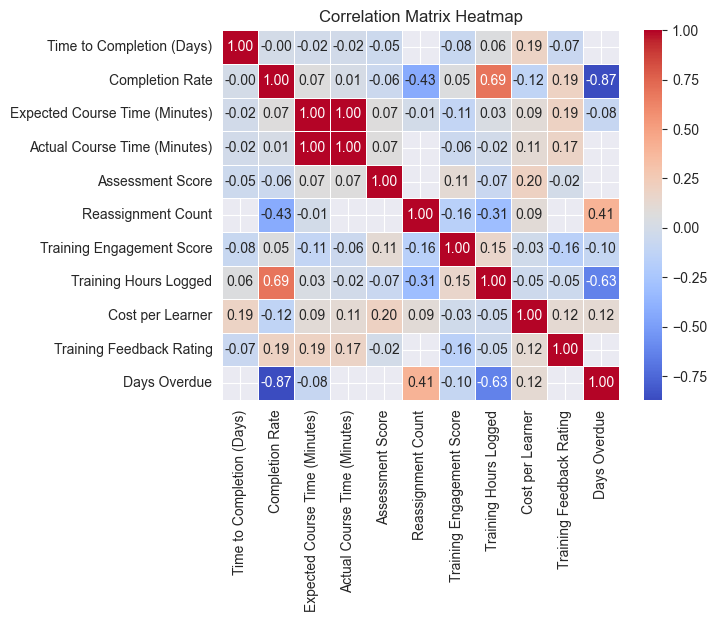

In [22]:
lms_corr = lms.select_dtypes(include=['number']).corr()
sns.heatmap(lms_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Engagement score** is weakly correlated with most variables; largest effect is -0.16 for **Reassignment count** which is 0 for most, highest is 2

**Cost per Learner** and **Assessment Score** moderately correlated (0.2) closely followed by **time to completion**

**Feeback Rating** moderately correlated with **Completion Rate** **Expected Course Time** **Actual Course Time**
<br>Negatively Correlated with **Engagement Score**
    <p>
    </p>
 SO Learners seem to rate longer courses more favorably and complete them at a higher rate
 Longer Courses are more expensive, don't have high engagement scores, and don't influence asssment scores

In [23]:
vendor_summary = lms.groupby("Content Vendor").agg({
    "Assessment Score" : "mean",
    "Training Engagement Score": "mean",
    "Training Feedback Rating" : "mean",
    "Cost per Learner": "mean",
    "Assignment Type": "count",
    "Actual Course Time (Minutes)" : "mean"
}).rename(columns={"Assignment Type": "Assignment Count"}).sort_values("Assignment Count", ascending=False)

/var/folders/nj/xfyjldcn4nxcjghr0067cz3c0000gn/T/ipykernel_30897/3666329350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_summary = lms.groupby("Content Vendor").agg({


In [24]:
vendor_summary

,Assessment Score,Training Engagement Score,Training Feedback Rating,Cost per Learner,Assignment Count,Actual Course Time (Minutes)
Content Vendor,,,,,,
Traliant,71.636364,4.945667,3.068182,297.615000,30,33.181818
Ninjio,73.714286,5.465769,2.871429,241.093462,26,15.607143
Ally Safety,77.750000,5.778500,2.468750,300.173500,20,46.875000
LinkedIn Learning,73.777778,3.806000,3.133333,325.165000,10,38.777778
BizLibrary,78.000000,6.181000,2.916667,218.976000,10,49.166667
Jeff Havens,77.750000,5.171111,3.000000,223.237778,9,44.375000
ACCO Training,72.833333,3.723750,5.000000,295.300000,8,42.000000
Skillsoft,81.166667,4.934286,2.850000,223.124286,7,35.666667
Udemy,73.000000,4.024286,3.680000,286.862857,7,34.400000


In [26]:
loc_outcomes = lms.groupby("Location").agg({
    "Assessment Score" : "mean",
    "Training Engagement Score": "mean",
    "Training Feedback Rating": "mean",
    "Cost per Learner": "mean",
}).round(2)
print(loc_outcomes)

             Assessment Score  Training Engagement Score  \
Location                                                   
Boise                   76.57                       5.19   
Denver                  74.67                       5.07   
Las Vegas               74.94                       5.29   
Pasadena                77.40                       4.87   
Reno                    69.10                       5.36   
San Leandro             72.83                       4.20   
Seattle                 76.63                       5.17   

             Training Feedback Rating  Cost per Learner  Content Vendor  
Location                                                                 
Boise                            3.29            275.11              29  
Denver                           3.30            287.14              15  
Las Vegas                        2.89            244.58              21  
Pasadena                         2.78            278.13              27  
Reno           

/var/folders/nj/xfyjldcn4nxcjghr0067cz3c0000gn/T/ipykernel_30897/1005825847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loc_outcomes = lms.groupby("Location").agg({


In [37]:
loc_vendor = pd.crosstab(
    lms["Location"],
    lms["Content Vendor"],
)

print(loc_vendor)

Content Vendor  ACCO BIM  ACCO Training  Ally Safety  BizLibrary  Coursera  \
Location                                                                     
Boise                  0              2            3           1         1   
Denver                 0              1            3           1         0   
Las Vegas              0              1            2           0         0   
Pasadena               3              0            3           1         0   
Reno                   1              1            1           1         0   
San Leandro            1              1            1           3         1   
Seattle                1              2            7           3         1   

Content Vendor  Go1  Infosec Institute  Jeff Havens  LinkedIn Learning  \
Location                                                                 
Boise             1                  0            2                  1   
Denver            0                  1            0                  0   
L

In [43]:
loc_vendor.mean(axis=1).round(2) #row mean; avg # trainings assigned by location

Location
Boise          2.07
Denver         1.07
Las Vegas      1.50
Pasadena       1.93
Reno           1.29
San Leandro    1.00
Seattle        1.86
dtype: float64

In [44]:
loc_vendor.mean(axis=0).round(2) #col mean; avg # training bought from vendor

Content Vendor
ACCO BIM             0.86
ACCO Training        1.14
Ally Safety          2.86
BizLibrary           1.43
Coursera             0.43
Go1                  0.57
Infosec Institute    0.43
Jeff Havens          1.29
LinkedIn Learning    1.43
Lynda.com            1.00
Ninjio               3.71
Skillsoft            1.00
Traliant             4.29
Udemy                1.00
dtype: float64

In [45]:
loc_train = pd.crosstab(
    lms["Location"],
    lms["Training Program"]
)
print(loc_train)

Training Program  Customer Service  Cyber Security  Delegation  \
Location                                                         
Boise                            3               4           3   
Denver                           2               3           0   
Las Vegas                        2               3           4   
Pasadena                         5               3           7   
Reno                             0               3           5   
San Leandro                      4               2           0   
Seattle                          8               0           2   

Training Program  Harassment Prevention  Leadership Essentials  \
Location                                                         
Boise                                 4                      5   
Denver                                3                      3   
Las Vegas                             4                      3   
Pasadena                              3                      2   
Reno     